# Build ML models

In [1]:
# ! python3 -m pip install 'scikit-learn'

In [2]:
# ! python3 -m pip install shap


In [25]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np
import time
import shap

import sklearn

# import shap


In [26]:
# From /home/michalula/code/epiCausality/epiCode/PIPELINE_extract_plot_mCG_strands_profiles_bigger_window.ipynb
# CGs_all saved as CG_combined_silenced_T_primerES_nCATS_numFWD3852_numRVS2805_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy in dimelo_v2_output
# Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)

In [27]:
CGs_all_silenced = np.load("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_silenced_T_primerES_nCATS_numFWD4132_numRVS2965_padded_reads_silenced_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy")

# ('/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_silenced_T_primerES_nCATS_numFWD3852_numRVS2805_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy')
# Silenced T cells nCATS:
# Threshold 0.7 = ("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_silenced_T_primerES_nCATS_numFWD4132_numRVS2965_padded_reads_silenced_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy")
# # Threshold 0.9 =( '/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_silenced_T_primerES_nCATS_numFWD3852_numRVS2805_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy')

CGs_all_silenced, CGs_all_silenced.shape

(array([[nan, nan, nan, ..., nan, nan,  1.],
        [nan, nan,  1., ..., nan, nan, nan],
        [nan,  1.,  1., ..., nan, nan,  1.],
        ...,
        [nan, nan, nan, ...,  1., nan,  1.],
        [nan, nan, nan, ...,  1.,  1., nan],
        [nan, nan, nan, ..., nan,  1., nan]]),
 (7097, 10))

In [30]:
CGs_all_silenced_full = CGs_all_silenced.copy()
CGs_all_silenced_full, CGs_all_silenced_full.shape

(array([[nan, nan, nan, ..., nan, nan,  1.],
        [nan, nan,  1., ..., nan, nan, nan],
        [nan,  1.,  1., ..., nan, nan,  1.],
        ...,
        [nan, nan, nan, ...,  1., nan,  1.],
        [nan, nan, nan, ...,  1.,  1., nan],
        [nan, nan, nan, ..., nan,  1., nan]]),
 (7097, 10))

In [31]:
# Assuming CGs_all_silenced is your NumPy array of shape (6657, 10)
num_rows = CGs_all_silenced.shape[0]  # Total number of rows
subset_size = 1743 # 1304  # Define how many rows you want to randomly select

# Randomly select row indices
random_indices = np.random.choice(num_rows, subset_size, replace=False)

# Get the subset
subset = CGs_all_silenced[random_indices]

# Display the shape to confirm
print(subset.shape)  # Should be (subset_size, 10)

CGs_all_silenced = subset
CGs_all_silenced

(1743, 10)


array([[nan,  1.,  1., ..., nan, nan, nan],
       [nan, nan, nan, ...,  1., nan, nan],
       [nan, nan,  1., ...,  1.,  1., nan],
       ...,
       [ 1., nan, nan, ...,  1., nan,  1.],
       [nan, nan,  1., ...,  1., nan, nan],
       [nan, nan,  1., ...,  1.,  1., nan]])

In [32]:
CGs_all_silenced

array([[nan,  1.,  1., ..., nan, nan, nan],
       [nan, nan, nan, ...,  1., nan, nan],
       [nan, nan,  1., ...,  1.,  1., nan],
       ...,
       [ 1., nan, nan, ...,  1., nan,  1.],
       [nan, nan,  1., ...,  1., nan, nan],
       [nan, nan,  1., ...,  1.,  1., nan]])

In [33]:
# Undetided T cells nCATS get lable 0 as CD55 is lowly expressed in silened T cells (~90% of cells should be silenced)
y_silenced = np.array([0] * CGs_all_silenced.shape[0])
y_silenced, y_silenced.shape

(array([0, 0, 0, ..., 0, 0, 0]), (1743,))

In [34]:
CGs_all_unedited = np.load("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_unedited_T_primerES_nCATS_numFWD1081_numRVS662_padded_reads_unedited_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy")

# ("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_unedited_T_primerES_nCATS_numFWD788_numRVS516_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy")

# Unedited T cells nCATS:
# Threshold 0.7 =  ("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_unedited_T_primerES_nCATS_numFWD1081_numRVS662_padded_reads_unedited_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy")
# Threshold 0.9 =("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_unedited_T_primerES_nCATS_numFWD788_numRVS516_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy")

CGs_all_unedited, CGs_all_unedited.shape

(array([[nan, nan,  1., ..., nan,  1.,  1.],
        [ 1., nan, nan, ..., nan, nan, nan],
        [ 1.,  1.,  1., ...,  1., nan, nan],
        ...,
        [nan,  1., nan, ...,  1., nan, nan],
        [ 1., nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ...,  1., nan, nan]]),
 (1743, 10))

In [35]:
# Undetided T cells nCATS get lable 1 as CD55 is highly expressed in undetided T cells
y_unedited = np.array([1] * CGs_all_unedited.shape[0])
y_unedited, y_unedited.shape

(array([1, 1, 1, ..., 1, 1, 1]), (1743,))

In [36]:
X_unedited_silenced = np.concatenate((CGs_all_unedited, CGs_all_silenced), axis=0)
X_unedited_silenced, X_unedited_silenced.shape

(array([[nan, nan,  1., ..., nan,  1.,  1.],
        [ 1., nan, nan, ..., nan, nan, nan],
        [ 1.,  1.,  1., ...,  1., nan, nan],
        ...,
        [ 1., nan, nan, ...,  1., nan,  1.],
        [nan, nan,  1., ...,  1., nan, nan],
        [nan, nan,  1., ...,  1.,  1., nan]]),
 (3486, 10))

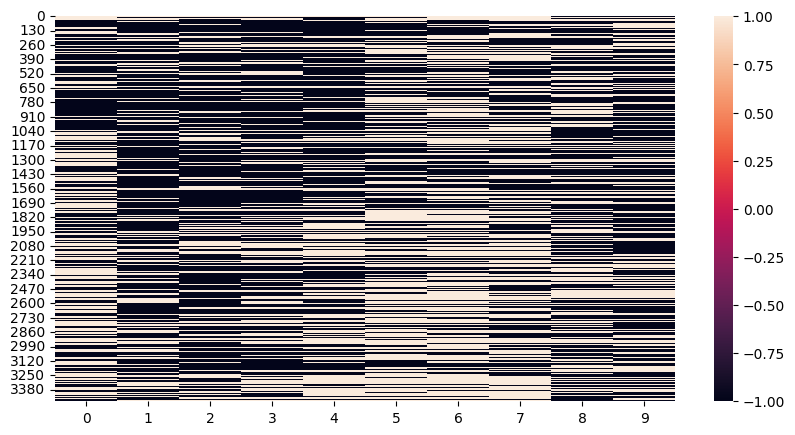

In [37]:
# plot X_unedited_silenced 

# Heatmap of CGs_all
plt.figure(figsize=(10, 5))
sns.heatmap(pd.DataFrame(X_unedited_silenced).fillna(-1))
# plt.title(f"Concatinated CGs_all (Forward and Reverse) (bright = mC, dark = C)\n(Fwd: {sum(fwd_reads_bools)}, Rev: {sum(rvs_reads_bools)})")
plt.show()


In [16]:
y_unedited_silenced = np.concatenate((y_unedited, y_silenced), axis=0)
y_unedited_silenced, y_unedited_silenced.shape

(array([1, 1, 1, ..., 0, 0, 0]), (3486,))

In [39]:
train_idx, test_idx = train_test_split(np.arange(y_unedited_silenced.shape[0]), train_size=.75, random_state=16, shuffle=True)
train_idx, test_idx

(array([2940, 3078, 3050, ..., 2169, 3310, 2729]),
 array([ 735, 3343, 2698, 3032, 2847, 1685,  959, 3200, 1009, 2564,  569,
        3449, 2214,  219,  679,  943, 3232, 1457, 1709, 2493, 1215, 1160,
        2433, 1508, 1718, 2823, 2270, 2256, 3028, 1112, 3379, 3011, 1063,
        2569, 2458, 2349,   78, 1261, 3131, 1347, 2998,  155,  454, 2694,
        1575,  747, 2462, 2092, 3132, 2150, 3352, 2670, 3306, 2402, 2642,
        2284, 2242,  126,   22, 2464, 2101, 1253, 3046, 2938,    5,  202,
         241, 2083, 3231,  546,  955, 1516, 1906, 1333, 3413, 2571, 2397,
        2495, 3248,  588, 2934,  548,  571, 2009, 3222,  927, 1262, 2477,
        2236, 1346, 1941, 1175, 2617,  419, 1437,  550,  704, 2911, 2957,
        1778, 1572, 1833, 3223, 1550, 2559, 2920,  320,  628, 2704, 2551,
        3460, 3241,  934, 3304,  396, 2183,  173,  214, 1179,  425,  176,
        1093,  940, 1453, 2562, 3407, 1932, 2860, 3361,  394,  827, 1480,
        2153,  506, 3207, 1865,  859, 2062, 1005, 2192, 1366,

In [40]:
X = pd.DataFrame(X_unedited_silenced).fillna(-1)
Y = y_unedited_silenced

In [41]:
X.iloc[16:23,:]

0    1    2    3    4    5    6    7    8    9
16 -1.0 -1.0  1.0  1.0  1.0  1.0 -1.0  1.0 -1.0 -1.0
17 -1.0  1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  1.0
18  1.0 -1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0 -1.0
19 -1.0  1.0 -1.0 -1.0 -1.0 -1.0  1.0  1.0  1.0  1.0
20  1.0  1.0  1.0  1.0 -1.0  1.0  1.0  1.0 -1.0 -1.0
21 -1.0  1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  1.0
22  1.0 -1.0 -1.0 -1.0 -1.0  1.0  1.0  1.0 -1.0 -1.0

In [42]:
X_train, X_test = X.iloc[train_idx, :], X.iloc[test_idx, :]
Y_train, Y_test = Y[train_idx], Y[test_idx]

In [52]:
def predict_reg(f, X, Y):
    preds = f.predict(X)
    print('preds=', preds[:16])
    preds_round = np.round(preds) # / 50) # 100-->2; 50-->1; 0-->0
    print('preds_round', preds_round[:16])
    print('np.mean(preds_round==Y)*100 =', np.mean(preds_round==Y)*100)
    print('Y', Y[:16])
    # preds012 = np.round(preds / 50) # 100-->2; 50-->1; 0-->0
    # print('preds012', preds012[:16])
    # print('np.mean(preds012*50==Y)*100 =', np.mean(preds012*50==Y)*100)
    return np.mean(preds_round==Y)*100

model = LinearRegression().fit(X_train,Y_train)
print("GLM: {:.2f}%".format(predict_reg(model, X_test, Y_test)))

print("####")
model = DecisionTreeRegressor().fit(X_train,Y_train)
print("Tree: {:.2f}%".format(predict_reg(model, X_test, Y_test)))
print("####")
model = RandomForestRegressor().fit(X_train,Y_train)
print("RF: {:.2f}%".format(predict_reg(model, X_test, Y_test)))
print("####")
model = GradientBoostingRegressor().fit(X_train,Y_train)
print("GBM: {:.2f}%".format(predict_reg(model, X_test, Y_test)))
print("####")
model = MLPRegressor(max_iter=1000,hidden_layer_sizes=(50,20)).fit(X_train, Y_train)
print("NN: {:.2f}%".format(predict_reg(model, X_test, Y_test)))

print("####")
model = LogisticRegression(max_iter=1000, penalty="l1", solver='saga').fit(X_train,Y_train)
print("Sparse GLM: {:.2f}%".format(predict_reg(model, X_test, Y_test)))

preds= [0.52726166 0.50463283 0.25441269 0.60232707 0.52556384 0.67256689
 0.49701734 0.36082184 0.65776116 0.3864686  0.67473913 0.50833948
 0.48370447 0.46932266 0.40764335 0.74272638]
preds_round [1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1.]
np.mean(preds_round==Y)*100 = 60.89449541284404
Y [1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1]
GLM: 60.89%
####
preds= [0.58333333 0.         0.         0.5        0.27272727 1.
 0.         0.5        0.66871166 0.48148148 0.79166667 0.66666667
 0.         1.         0.48148148 0.76119403]
preds_round [1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1.]
np.mean(preds_round==Y)*100 = 57.91284403669725
Y [1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1]
Tree: 57.91%
####
preds= [0.57684158 0.35933333 0.01833333 0.51279854 0.2582008  0.89948204
 0.16074764 0.40840842 0.6686185  0.47783542 0.79510006 0.64163756
 0.06053501 0.7655     0.47780106 0.76061442]
preds_round [1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1.]
np.mean(preds_round==Y)*100 = 59.977064220183486
Y [1 0 0 

preds= [ 0.55012931  0.66733376 -0.15649976  0.49940954  0.27345629  0.68955828
  0.22218784  0.49947374  0.73084297  0.44700421  0.85453638  0.61788066
  0.15044909  0.46897272  0.46082532  0.80694504]
preds_round [ 1.  1. -0.  0.  0.  1.  0.  0.  1.  0.  1.  1.  0.  0.  0.  1.]
np.mean(preds_round==Y)*100 = 58.37155963302752
Y [1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1]
NN: 58.37%
####
preds= [1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1]
preds_round [1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1]
np.mean(preds_round==Y)*100 = 60.89449541284404
Y [1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1]
Sparse GLM: 60.89%


In [53]:
print(np.argsort(-np.abs(model.coef_), axis=1)+1)
print(np.abs(model.coef_))

[[10  9  5  6  4  1  3  7  2  8]]
[[0.13765855 0.04303127 0.10131306 0.15011714 0.15743832 0.15590294
  0.0955944  0.00078799 0.17282351 0.18867151]]


In [54]:
celltypes = ["unedited", "silenced"]
celltypes

['unedited', 'silenced']

In [67]:
model.coef_

array([[-0.13765855,  0.04303127, -0.10131306, -0.15011714, -0.15743832,
        -0.15590294, -0.0955944 , -0.00078799, -0.17282351, -0.18867151]])

In [64]:
np.arange(1, 11)


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [71]:
(model.coef_).shape[1]

10

In [73]:
X_axis = np.arange(1, model.coef_.shape[1]+1)# +1 # np.arange(10)+1
X_axis

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [78]:
np.abs(model.coef_)

array([[0.13765855, 0.04303127, 0.10131306, 0.15011714, 0.15743832,
        0.15590294, 0.0955944 , 0.00078799, 0.17282351, 0.18867151]])

/tmp/ipykernel_2297854/3999952595.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


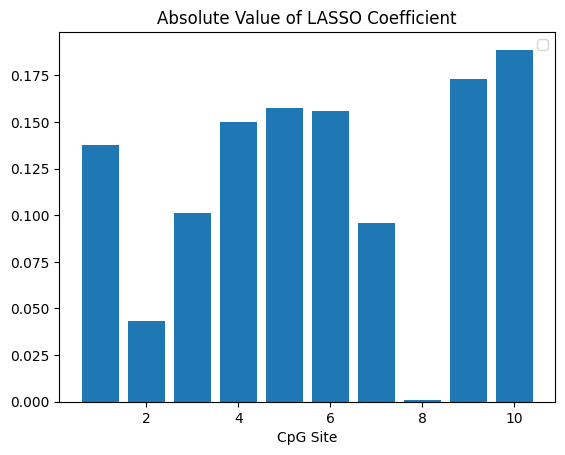

In [82]:

X_axis =  np.arange(1, model.coef_.shape[1]+1) # +1 # np.arange(10)+1
shifts = [-.4,-.15] #,.1]

# for i in range(1,2):
    # plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i]) 
    
plt.bar(X_axis, np.abs(model.coef_[0])) #, .25) #  model.coef_) # np.abs(model.coef_)), .25) # ,label=celltypes[i])

plt.legend()
plt.title("Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
# plt.xticks(X_axis)
plt.show()

In [83]:


def print_accuracy(f):
    print(f"Accuracy = {100 * np.sum(f(X_test) == Y_test) / len(Y_test)}%")
    time.sleep(0.5)  # to let the print get out before any progress bars


shap.initjs()

In [84]:
# K-nearest neighbors
knn = sklearn.neighbors.KNeighborsClassifier()
knn.fit(X_train, Y_train)

print_accuracy(knn.predict)
Accuracy = 96.66666666666667 # %
# Explain a single prediction from the test set
explainer = shap.KernelExplainer(knn.predict_proba, X_train)
shap_values = explainer.shap_values(X_test.iloc[0, :])
shap.force_plot(explainer.expected_value[0], shap_values[:, 0], X_test.iloc[0, :])

# Using 120 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
# Explain all the predictions in the test set
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[..., 0], X_test)

# sample order by similarity

# f(x)
# Support vector machine with a linear kernel
svc_linear = sklearn.svm.SVC(kernel="linear", probability=True)
svc_linear.fit(X_train, Y_train)
print_accuracy(svc_linear.predict)

# explain all the predictions in the test set
explainer = shap.KernelExplainer(svc_linear.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)
# this is multiclass so we only visualize the contributions to first class (hence index 0)
shap.force_plot(explainer.expected_value[0], shap_values[..., 0], X_test)

Accuracy = 58.944954128440365%


Using 2614 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/872 [00:00<?, ?it/s]

In [ ]:
# import shap
# Xshap = shap.kmeans(X_train, 20)
explainer = shap.Explainer(model.predict, X) # shap.data)
shapvals = explainer(X_test[:100])

sumabs = np.sum(np.abs(shapvals.values), axis=0)
plt.bar(X_axis, sumabs)
plt.xticks(X_axis)
plt.title("Global SHAP Importances")

# Add a 1D CNN model + interpret

In [ ]:
# Add a 1D CNN model + interpret
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.inspection import permutation_importance

# Create dummy data
x_train = np.random.rand(1000, 10, 1)
y_train = np.random.rand(1000) * 100

# Build the 1D CNN model
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(10, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(1)
])

# Compile and train the model
model.compile(optimizer='adam', loss='mse')
model.fit(x_train, y_train, epochs=10, batch_size=32)

# Evaluate feature importance
def score_func(X, y):
    pred = model.predict(X)
    return np.mean(np.abs(y - pred.flatten()))

# To fix the error, change the score_func
def score_func(estimator, X, y):
    pred = estimator.predict(X)
    return np.mean(np.abs(y - pred.flatten()))

# Create a copy of x_train reshaped for scoring
x_train_reshaped = x_train.reshape((1000, 10))

# Calculate permutation importance
results = permutation_importance(model, x_train_reshaped, y_train, scoring=score_func)

# Output feature importance
importance = results.importances_mean
for i, imp in enumerate(importance):
    print(f"Feature {i+1} importance: {imp}")

To enhance the provided code with a test set and plotting of evaluation metrics, specifically the mean squared error (MSE) on both training and test datasets, you can follow these steps. I'll use Matplotlib for plotting.


In [ ]:

# import numpy as np
# import matplotlib.pyplot as plt
# from keras.models import Sequential
# from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
# from sklearn.model_selection import train_test_split

# # Create dummy data
# x = np.random.rand(1200, 10, 1)
# y = np.random.rand(1200) * 100

# # Split the data into training and test sets
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# # Build the 1D CNN model
# model = Sequential([
#     Conv1D(32, kernel_size=3, activation='relu', input_shape=(10, 1)),
#     MaxPooling1D(pool_size=2),
#     Flatten(),
#     Dense(100, activation='relu'),
#     Dense(1)
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mse')

# # Train the model and save history
# history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# # Plot the training and validation loss
# plt.plot(history.history['loss'], label='Train MSE')
# plt.plot(history.history['val_loss'], label='Test MSE')
# plt.title('Model MSE')
# plt.ylabel('Mean Squared Error')
# plt.xlabel('Epoch')
# plt.legend(loc='upper right')
# plt.show()

In [ ]:
# Evaluate feature importance
# def score_func(X, y):
#     pred = model.predict(X)
#     return np.mean(np.abs(y - pred.flatten()))
# To fix the error, change the score_func:
def score_func(estimator, X, y):
    pred = estimator.predict(X)
    return np.mean(np.abs(y - pred.flatten()))

# Create a copy of x_train reshaped for scoring
x_train_reshaped = x_train.reshape((x_train.shape[0], 10))

# Calculate permutation importance
results = permutation_importance(model, x_train_reshaped, y_train, scoring=score_func)

# Output feature importance
importance = results.importances_mean
for i, imp in enumerate(importance):
    print(f"Feature {i+1} importance: {imp}")

In [ ]:
# To visualize feature importance for both training and testing datasets, we'll use bar plots to show the impact of each feature. Here is how you can enhance your Python script to include these visualizations using Matplotlib:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

# # Assume x and y are your full dataset and labels
# x, y = np.random.rand(1000, 10, 1), np.random.rand(1000) * 100
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Reshape for scoring
x_train_reshaped = x_train.reshape((x_train.shape[0], x_train.shape[1]))
x_test_reshaped = x_test.reshape((x_test.shape[0], x_test.shape[1]))

# Calculate permutation importance on training data
train_results = permutation_importance(model, x_train_reshaped, y_train, scoring=score_func)
test_results = permutation_importance(model, x_test_reshaped, y_test, scoring=score_func)

# Plotting
features = [f"Feature {i+1}" for i in range(x_train_reshaped.shape[1])]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(features, train_results.importances_mean)
plt.title('Feature Importance on Training Set')
plt.xlabel('Mean Decrease in Accuracy')

plt.subplot(1, 2, 2)
plt.barh(features, test_results.importances_mean)
plt.title('Feature Importance on Testing Set')
plt.xlabel('Mean Decrease in Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
To enhance the visualization of feature importance in your machine learning model, you can add a few more types of plots besides the basic bar plot. Here are a few additional types of visualizations you can implement:

# To enhance the visualization of feature importance in your machine learning model, you can add a few more types of plots besides the basic bar plot. Here are a few additional types of visualizations you can implement:

# Box Plot:
# A box plot can show the distribution of permutation importances across multiple runs, giving you a sense of variability in feature importance.
import seaborn as sns

# Calculate permutation importance on training data
train_results = permutation_importance(model, x_train_reshaped, y_train, scoring=score_func)
test_results = permutation_importance(model, x_test_reshaped, y_test, scoring=score_func)

# Assuming 'results' is the output from permutation_importance
# for i in range(x_train_reshaped.shape[1]):
#     sns.boxplot(data=results.importances[:, i], orient='v')
#     plt.title(f'Feature {i+1} Importance')
#     plt.show()
# Correctly access the importances array
num_features = results.importances.shape[1]  # This ensures you are within the correct range

for i in range(num_features):
    sns.boxplot(data=results.importances[:, i], orient='v')
    plt.title(f'Feature {i+1} Importance')
    plt.show()

# Feature Importance Heatmap:
# If your dataset isn't too large, you can visualize the importance across multiple features and samples using a heatmap.
import seaborn as sns
# Create a heatmap of the feature importance scores
sns.heatmap(results.importances.T, annot=True, cmap='viridis', fmt=".3f",
            xticklabels=[f"Sample {i+1}" for i in range(x_train_reshaped.shape[0])],
            yticklabels=[f"Feature {i+1}" for i in range(x_train_reshaped.shape[1])])
plt.title('Permutation Importance Heatmap')
plt.xlabel('Samples')
plt.ylabel('Features')
plt.show()

# Cumulative Importance Plot:
# This plot can help identify the number of features required to reach a certain threshold of total importance.
import numpy as np
import matplotlib.pyplot as plt

# Calculate cumulative importance
sorted_idx = np.argsort(results.importances_mean)[::-1]
cumulative_importance = np.cumsum(results.importances_mean[sorted_idx])

plt.plot(cumulative_importance)
plt.hlines(y=0.95, xmin=0, xmax=len(cumulative_importance), color='r', linestyles='dashed')
plt.title('Cumulative Feature Importance')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.show()
# These visualizations provide different perspectives on feature importance, helping you to better understand which features contribute most to the model and how stable their contributions are across different data subsets.


In [ ]:
# Calculate cumulative importance
sorted_idx = np.argsort(results.importances_mean)[::-1]
cumulative_importance = np.cumsum(results.importances_mean[sorted_idx])

plt.plot(cumulative_importance)
plt.hlines(y=0.95, xmin=0, xmax=len(cumulative_importance), color='r', linestyles='dashed')
plt.title('Cumulative Feature Importance')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.show()

In [ ]:
# To properly visualize permutation importance for both training and testing data in your machine learning model, let's refine the existing code to ensure correct use of both train_results and test_results. We will also plot these results side by side for each feature for better comparison.

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train_results' and 'test_results' are already calculated
num_features = train_results.importances.shape[1]

plt.figure(figsize=(15, 10))
for i in range(num_features):
    plt.subplot(num_features, 1, i + 1)
    # Plotting training data importance
    sns.boxplot(data=train_results.importances[:, i], color='blue', orient='h', saturation=0.5)
    # Plotting test data importance
    sns.boxplot(data=test_results.importances[:, i], color='red', orient='h', saturation=0.5)
    plt.title(f'Feature {i+1} Importance')
    plt.xlabel('Decrease in model performance')
    plt.ylabel('Importance')
    plt.legend(['Train', 'Test'])
plt.tight_layout()
plt.show()

# Explanation:
# Box Plot Modifications: Each feature's importance from both the training and testing datasets is plotted side by side to directly compare their distributions and see how the model reacts to the shuffling of each feature set.
# Layout Adjustments: Using plt.subplot() to plot each feature's importance on a separate subplot for clarity.
# Color Coding: Different colors for training and testing datasets help in distinguishing between the two, enhancing visual understanding.
# This code modification will help you clearly visualize how the permutation importance varies between training and testing datasets, thereby providing insights into model generalization and potential overfitting.

In [ ]:
features, test_results.importances_mean


In [ ]:
X_axis


In [ ]:
# for i in range(1,3):
    # plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
plt.bar(X_axis, test_results.importances_mean) # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])

plt.legend()
plt.title("importances_mean")# Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
plt.xticks(X_axis)
plt.show()

In [ ]:
shifts
# [-0.4, -0.15, 0.1]
# for i in range(1,3):
#     plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
plt.bar(X_axis+shifts[1], train_results.importances_mean, .25,label="train set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
plt.bar(X_axis+shifts[2], test_results.importances_mean, .25,label="test set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])

plt.legend()
plt.title("importances_mean")# Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
plt.xticks(X_axis)
plt.show()

In [ ]:
# for i in range(1,3):
#     plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
plt.bar(X_axis+shifts[1], (-1)*train_results.importances_mean, .25,label="train set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
plt.bar(X_axis+shifts[2], (-1)*test_results.importances_mean, .25,label="test set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])

plt.legend()
plt.title("importances_mean * -1")# Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
plt.xticks(X_axis)
plt.show()

In [ ]:
print(np.argsort(-np.abs(model.coef_), axis=1)+1)
print(np.abs(model.coef_))

In [ ]:
for i in range(1,3):
    plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
plt.legend()
plt.title("Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
plt.xticks(X_axis)
plt.show()

In [ ]:

# train_idx, test_idx = train_test_split(np.arange(y_unedited_silenced.shape[0]), train_size=.75, random_state=16)
# train_idx, test_idx

(array([5028, 2564, 4677, ..., 2169, 7406, 6825]),
 array([3883, 4444, 6867, ..., 4378, 5061,  126]))

In [ ]:
# # To visualize feature importance for both training and testing datasets, we'll use bar plots to show the impact of each feature. Here is how you can enhance your Python script to include these visualizations using Matplotlib:

# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.inspection import permutation_importance
# from sklearn.model_selection import train_test_split

# # # Assume x and y are your full dataset and labels
# # x, y = np.random.rand(1000, 10, 1), np.random.rand(1000) * 100
# # x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# # Reshape for scoring
# x_train_reshaped = x_train.reshape((x_train.shape[0], x_train.shape[1]))
# x_test_reshaped = x_test.reshape((x_test.shape[0], x_test.shape[1]))

# # Calculate permutation importance on training data
# train_results = permutation_importance(model, x_train_reshaped, y_train, scoring=score_func)
# test_results = permutation_importance(model, x_test_reshaped, y_test, scoring=score_func)

# # Plotting
# features = [f"Feature {i+1}" for i in range(x_train_reshaped.shape[1])]
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.barh(features, train_results.importances_mean)
# plt.title('Feature Importance on Training Set')
# plt.xlabel('Mean Decrease in Accuracy')

# plt.subplot(1, 2, 2)
# plt.barh(features, test_results.importances_mean)
# plt.title('Feature Importance on Testing Set')
# plt.xlabel('Mean Decrease in Accuracy')

# plt.tight_layout()
# plt.show()